In [1]:
import sys
sys.path.append('../../src')

from TrafficLight import PeriodicTrafficLight, AdaptiveTrafficLight, TrafficLightMirror
import Model1
import Model2
from ModelEvaluation import Evaluator, MultiEvaluator
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import pickle

In [2]:
output_path = '../../data/'

*Periodic traffic lights*

In [3]:
light_ew = PeriodicTrafficLight()
light_ew.initialize(period=30, time_delay=0, green_ratio=0.8)

light_ns = TrafficLightMirror()
light_ns.initialize(traffic_light=light_ew)

*Adaptive traffic lights*

In [4]:
light_ew = AdaptiveTrafficLight()
light_ew.initialize(sensor_depth=8, rule=2)

light_ns = TrafficLightMirror()
light_ns.initialize(traffic_light=light_ew)

In [5]:
network = Model1.IntersectionNetworkSimulator()
network.initialize(grid_dimensions=(1,1))
network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, arrival_rate_n=lambda t: 0.1+0.001*t, arrival_rate_e=lambda t: 1/3, arrival_rate_s=lambda t: 1/4, arrival_rate_w=lambda t: 1/3)
network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
network.set_observable_intersections(grid_inds=network.grid_inds)

In [6]:
network.simulate(delta_t=0.1, end_time=1000, animate=False, fig_width=4, output_destination="../../data/vids/", file_name="simulation_1x1.mp4", speed=1)

In [7]:
stats = network.get_stats()
print("Average wait time:", stats[(0,0)]["N"]["wait_time"], "s")
print("Average queue length: ", stats[(0,0)]["N"]["avg_queue_length"], "vehicles")

Average wait time: 5.693416370106781 s
Average queue length:  5.3163 vehicles


In [8]:
print("Average wait time:", stats[(0,0)]["E"]["wait_time"], "s")
print("Average queue length: ", stats[(0,0)]["E"]["avg_queue_length"], "vehicles")

Average wait time: 11.052243589743641 s
Average queue length:  5.5759 vehicles


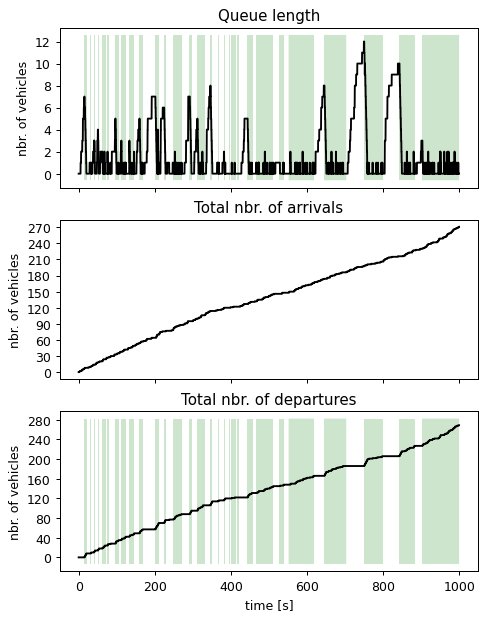

In [15]:
fig, axs = network.plot_queue_stats(plt=plt, grid_ind=(0,0), direction='S', end_time=1000, delta_t=0.1, traffic_light=light_ns,fig_size=(6,8))
plt.savefig(output_path+'figs/eastbound_(0,0)', bbox_inches='tight')

In [10]:
from scipy.stats import expon, poisson
rate=1/4
expon.cdf(x=0.1, scale=4)
#vps = 0.25
#rate = 0.25*2
#poisson.cdf(k=1, mu=rate)

0.024690087971667333

In [11]:
network.intersections[(0,0)].queue_w.arrivals[-1]

318

In [12]:
import random
random.random() < 0

False